In [1]:
import os
import tensorflow as tf

from PIL import UnidentifiedImageError

# image processsing
from tensorflow.keras.preprocessing.image import (load_img,
                                                  img_to_array,
                                                  ImageDataGenerator)

# VGG16 model
from tensorflow.keras.applications.vgg16 import (preprocess_input,
                                                 decode_predictions,
                                                 VGG16)

# layers
from tensorflow.keras.layers import (Flatten, 
                                     Dense, 
                                     Dropout, 
                                     BatchNormalization)

# generic model object
from tensorflow.keras.models import Model

# optimizers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD, Adam

#scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# for plotting
import numpy as np
import matplotlib.pyplot as plt

2024-04-11 15:15:44.229984: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 15:15:44.235023: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-11 15:15:44.304949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 15:15:45.896406: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
def plot_history(H, epochs, outpath):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label = "train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label = "val_loss", linestyle = ":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label = "train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label = "val_acc", linestyle = ":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()
    plt.savefig(outpath)

In [3]:
folder_path = os.path.join("../../../../cds-vis-data/Tobacco3482")

# Initialize empty lists
list_of_images = [] 
list_of_labels = []

# Loop through subfolders
for subfolder in sorted(os.listdir(folder_path)):

        # Extract images from the individual folders
        subfolder_path  = os.path.join(folder_path, subfolder)

        for file in os.listdir(subfolder_path):
                
                individual_filepath = os.path.join(subfolder_path, file)

                try:
                        # Load image from file
                        image = load_img(individual_filepath, target_size = (224, 224))
                        # Convert the image pixels to a numpy array
                        image = img_to_array(image)
                        list_of_images.append(image)

                        # Extract image name and append to list
                        #image_name = individual_filepath.split("/")[-1]
                        #list_of_images.append(image_name)

                        # Extract label and append to list
                        label = subfolder_path.split("/")[-1]
                        list_of_labels.append(label)
                        
                        # Append the preprocessed image along with its label as a tuple
                        #list_of_images.append((image, label))

                except (UnidentifiedImageError):
                        print(f"Skipping {individual_filepath}")

array_of_images = np.array(list_of_images)
X = preprocess_input(array_of_images)
y = list_of_labels

Skipping ../../../../cds-vis-data/Tobacco3482/ADVE/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Email/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Form/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Letter/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Memo/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/News/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Note/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Report/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Resume/Thumbs.db
Skipping ../../../../cds-vis-data/Tobacco3482/Scientific/Thumbs.db


In [11]:
def load_images(folder_path):
        
        # Initialize empty lists
        list_of_images = [] 
        list_of_labels = []

        for subfolder in sorted(os.listdir(folder_path)):
                
                # Extract images from the individual folders
                subfolder_path  = os.path.join(folder_path, subfolder)
                
                for file in os.listdir(subfolder_path):
                        
                        individual_filepath = os.path.join(subfolder_path, file)
                        
                        try:
                                # Load image from file
                                image = load_img(individual_filepath, target_size = (224, 224))

                                # Convert the image pixels to a numpy array
                                image = img_to_array(image)

                                list_of_images.append(image)

                                # Extract image name and append to list
                                #image_name = individual_filepath.split("/")[-1]
                                #list_of_images.append(image_name)

                                # Extract label and append to list
                                label = subfolder_path.split("/")[-1]
                                list_of_labels.append(label)
                
                        except (UnidentifiedImageError):
                                print(f"Skipping {individual_filepath}")
        
        array_of_images = np.array(list_of_images)
        X = preprocess_input(array_of_images)
        y = list_of_labels
        
        return X, y


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

X_train = X_train.astype("float32") / 255.
X_test = X_test.astype("float32") / 255.

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)   # shape (2785, 10)
y_test = lb.fit_transform(y_test)     # shape (697, 10)


In [ ]:
def data_split(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)
    X_train = X_train.astype("float32") / 255.
    X_test = X_test.astype("float32") / 255.
    lb = LabelBinarizer()
    y_train = lb.fit_transform(y_train)
    y_test = lb.fit_transform(y_test) 

    return X_train, X_test, y_train, y_test

Vi kører alle
```
model = VGG16()

# skal vi alle gøre - load model without classifier layers
model = VGG16(include_top = False,        # dont use the final layer of the classifier
              pooling = 'avg',
              input_shape = (32, 32, 3))  # (height, width, number of color-channels)

# skal vi alle gøre - mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False
```

1. Ida kører clean model:
```
flat1 = Flatten()(model.layers[-1].output)  # take final layer (-1) in the model and append to flat1
class1 = Dense(128, activation = 'relu')(flat1)
output = Dense(10, activation = 'softmax')(class1)
```

2. Laura kører BatchNorm
```
flat1 = Flatten()(model.layers[-1].output)
bn = BatchNormalization()(flat1)
class1 = Dense(128, 
               activation='relu')(bn)
output = Dense(10, 
               activation='softmax')(class2)
```

3. Jeg Sofie kører data argumentation - nedenstående

4. Alle kører både sgd og adam!
```
sgd = SGD(learning_rate=lr_schedule)
adam = Adam(learning_rate=lr_schedule)
```

In [ ]:
# load model without classifier layers
model = VGG16(include_top = False, 
              pooling = 'avg',
              input_shape = (224, 224, 3)) 

# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False

model.summary()

In [ ]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
bn = BatchNormalization()(flat1)
class2 = Dense(128, 
               activation='relu')(bn)
output = Dense(10, 
               activation='softmax')(class2)

# define new model
model = Model(inputs = model.inputs, 
              outputs = output)

# compile
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10000,
    decay_rate = 0.9)
    
#sgd = SGD(learning_rate=lr_schedule)
adam = Adam(learning_rate=lr_schedule)

model.compile(optimizer = adam,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
# summarize
model.summary()

In [7]:
# Define data generator

# Add noise to an image
def add_noise(image):
    noise = np.random.normal(0, scale = 25, size = image.shape)
    noisy_image = np.clip(image + noise, 0, 255) #.astype(np.uint8)
    return noisy_image

# flip along x axis (mirror image)
datagen = ImageDataGenerator(horizontal_flip = True, 
                             rotation_range = 90,
                             #preprocessing_function = add_noise(),
                             validation_split = 0.1)


In [8]:
# Train

# fit the data generator to our images
datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
H = model.fit(datagen.flow(X_train, y_train, batch_size = 32), # change
                            validation_data = datagen.flow(X_train, y_train, 
                                                           batch_size = 32,  # change
                                                           subset = "validation"),
                                                           epochs = 10)   # training for less time

# first test batch 128, epoch 10
# 1 epoch 358s = ca 6 min


Epoch 1/10


/home/ucloud/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 348s 4s/step - accuracy: 0.5014 - loss: 1.7394 - val_accuracy: 0.2914 - val_loss: 2.0250
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.6270 - loss: 1.1361 - val_accuracy: 0.3777 - val_loss: 1.8631
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.6441 - loss: 1.0461 - val_accuracy: 0.3381 - val_loss: 1.8198
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step - accuracy: 0.6737 - loss: 0.9953 - val_accuracy: 0.5971 - val_loss: 1.4736
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 357s 4s/step - accuracy: 0.6679 - loss: 0.9955 - val_accuracy: 0.6583 - val_loss: 1.1376
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 359s 4s/step - accuracy: 0.6899 - loss: 0.9296 - val_accuracy: 0.6871 - val_loss: 1.0343
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - accuracy: 0.6848 - loss: 0.9145 - val_accuracy: 0.7266 - val_loss: 0.8363
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.7057 - loss: 0.8803 - val_accuracy: 0.7014 - val_loss: 0.

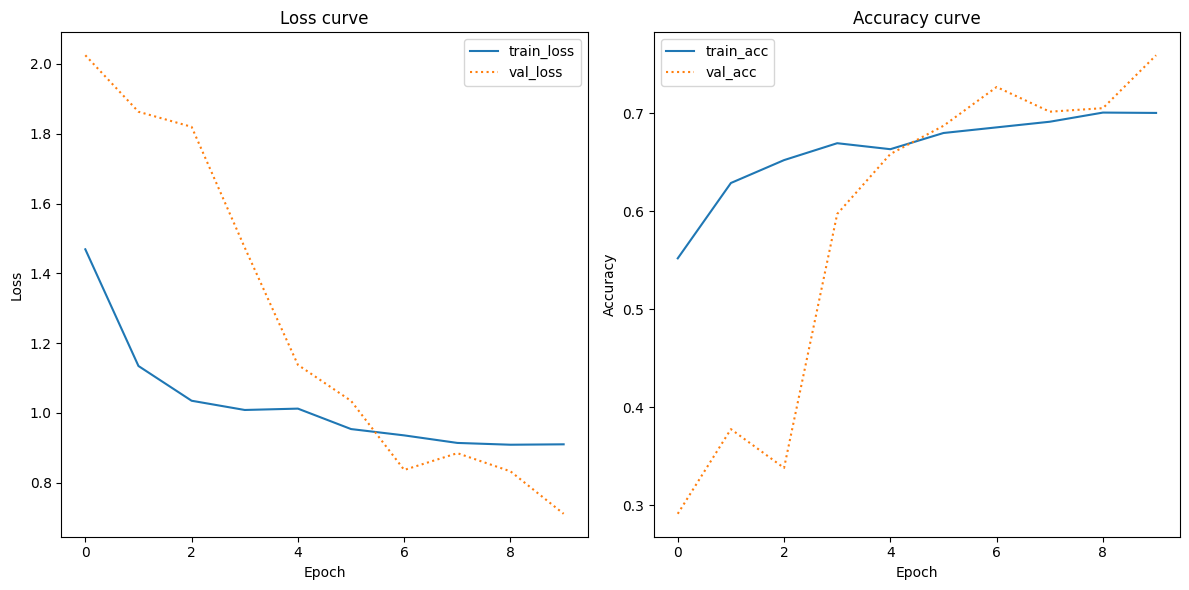

<Figure size 640x480 with 0 Axes>

In [12]:
# Inspect

plot_history(H, 10, "out/VGG16_losscurve_DatAug_adam.png")


In [13]:
# Evaluate
label_names = ["ADVE", "Email", "Form", "Letter", "Memo", "News", "Note", "Report", "Resume", "Scientific"]

predictions = model.predict(X_test, batch_size = 32)
classifier_metrics = classification_report(y_test.argmax(axis = 1),
                            predictions.argmax(axis = 1),
                            target_names = label_names)


print(classifier_metrics)

filepath_metrics = open('out/VGG16_metrics_DatAug_adam.txt', 'w')
filepath_metrics.write(classifier_metrics)
filepath_metrics.close()


22/22 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step
              precision    recall  f1-score   support

        ADVE       0.89      0.87      0.88        46
       Email       0.88      0.82      0.85       120
        Form       0.50      0.85      0.63        86
      Letter       0.81      0.38      0.51       114
        Memo       0.47      0.70      0.56       124
        News       0.77      0.89      0.83        38
        Note       0.58      0.62      0.60        40
      Report       0.48      0.21      0.29        53
      Resume       0.31      0.17      0.22        24
  Scientific       0.46      0.31      0.37        52

    accuracy                           0.62       697
   macro avg       0.62      0.58      0.57       697
weighted avg       0.65      0.62      0.60       697



In [ ]:
def eval_model(X_test, y_test, model, H, optimizer):

    predictions = model.predict(X_test)
    VGG16_metrics = classification_report(y_test.argmax(axis = 1),
                                            predictions.argmax(axis = 1),
                                            target_names = label_names)
    filepath_metrics = open(f'out/VGG16_metrics{optimizer}.txt', 'w')
    filepath_metrics.write(VGG16_metrics)
    filepath_metrics.close()

    plot_history(H, 5, f"../out/VGG16_losscurve{optimizer}.png")

    return print("Results have been saved to the out folder")

In [ ]:
filepath_report = "out/LR_classification_report.txt"
    with open(filepath_report, 'w') as file:
        file.write(classifier_metrics)

In [40]:
def main():
    folder_path = os.path.join("../../../../cds-vis-data/Tobacco3482/") # change to in for the final script
    
    list_of_images, list_of_labels = load_images(folder_path)
    
    preprocessed_images = preprocess_images(list_of_images)
    #preprocessed_images = [(preprocess_images(image), label) for image, label in preprocessed_images]
